In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import linalg

# Orthogonal matching pursuit (OMP)
#
# Y. C. Pati, R. Rezaiifar, and P. S. Krishnaprasad, 
# "Orthogonal matching pursuit: Recursive function approximation with applications to wavelet decomposition."
# The Twenty-Seventh Asilomar Conference on Signals, Systems and Computers, pp. 40-44, 1993.
#
def OMP(A, b, tol=1e-5, maxnnz=np.inf):
    m, n = A.shape
    supp = []
    x = np.zeros(n)
    r = b.copy()
    while len(supp) < maxnnz and linalg.norm(r) > tol:
        s = np.argmax(np.abs( A.T.dot(r) ))
        supp.append(s)
        Asupp = A[:,supp]
        x[supp] = np.linalg.lstsq(Asupp, b)[0]
        r = b - Asupp.dot(x[supp])
    return x

In [3]:
from time import time
#%% Demo: Sparse solvers
rng = np.random.RandomState(int(time()))
#m, n = 512, 2048
m, n = 1024, 8192
#m, n = 2000, 4000

# use a random matrix as a basis (design matrix)
A = rng.randn(m, n) / np.sqrt(m)

# generate a k-sparse Gaussian signal vector
k = 100
stdx = 1.
snr = 10.

x_true = np.zeros(n)
T = np.sort(rng.choice(n,k,replace=False))
print('True support of %d nonzeros = ' % (k))
print(T)
x_true[T] = rng.randn(k) * stdx

# make the query vector
b = A.dot(x_true)

# add noise
normb = linalg.norm(b)
noise = rng.randn(m)
noise = noise / linalg.norm(noise) * normb / snr
tol = linalg.norm(noise)
b = b + noise

# OMP
print("Running OMP..")
t0 = time()
#x_est = OMP(A, b, maxnnz=100)
x_est = OMP(A, b, tol=tol)
print('done in %.2fs.' % (time() - t0))

Tpred = np.nonzero(x_est)[0]
print('Predicted supprt of %d nonzeros = ' % (np.count_nonzero(x_est)))
print(Tpred)

from sklearn import metrics
print(metrics.classification_report(x_true == 0, x_est == 0))
print(metrics.confusion_matrix(x_true == 0, x_est == 0))

True support of 100 nonzeros = 
[  78  128  190  208  231  233  404  507  698  780  870 1038 1131 1189 1227
 1473 1479 1568 1678 1747 2118 2136 2202 2264 2340 2405 2482 2506 2556 2789
 2925 3037 3078 3099 3163 3273 3449 3671 3792 4165 4376 4450 4504 4562 4674
 4895 4958 4971 4978 5016 5092 5130 5171 5240 5246 5328 5380 5402 5499 5592
 5646 5665 5708 5753 5763 5809 5889 5900 5941 5957 6063 6112 6125 6168 6171
 6301 6427 6551 6572 6637 6846 6934 7026 7081 7213 7232 7291 7532 7533 7573
 7630 7631 7829 7846 7887 8092 8095 8119 8120 8183]
Running OMP..
done in 1.35s.
Predicted supprt of 91 nonzeros = 
[  78  128  190  208  233  507  698  780  870 1038 1131 1189 1227 1473 1479
 1568 1678 1747 2118 2136 2202 2264 2340 2405 2482 2506 2789 3037 3078 3099
 3163 3273 3449 3671 3792 4165 4376 4450 4504 4562 4674 4895 4958 4971 4978
 5016 5092 5130 5171 5246 5328 5380 5402 5592 5646 5665 5708 5763 5809 5889
 5900 5941 5957 6063 6112 6125 6168 6171 6301 6427 6551 6572 6637 6846 7026
 7081 7213 7232 

rel. error = 4.32e-02


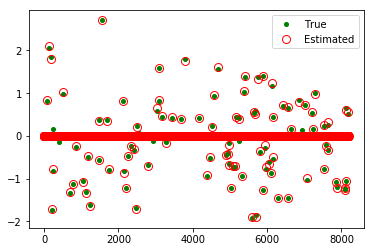

In [4]:
print('rel. error = %.2e' % (linalg.norm(x_est-x_true)/linalg.norm(x_true)))
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(n), x_true, 'g.', markersize=8, mec='green', label='True')
plt.plot(np.arange(n), x_est, 'ro', mfc = 'None', markersize=8, mec='red', label='Estimated')
plt.legend(loc='upper right', shadow=False)
plt.show()